In [1]:
from stockanalysis.data import *
from stockanalysis.encoder import *

from stockanalysis.utils import *


from stockanalysis.param import *


2022-03-08 20:18:30.783789: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 20:18:30.783817: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
ticker = "AAPL"



#Get Data


start_date = (datetime.datetime.now() - datetime.timedelta(days=5 * 365)).strftime("%Y-%m-%d")
end_date = datetime.datetime.now().strftime("%Y-%m-%d")
cleaned_data = get_technical(symbol=ticker, start=start_date,
                                 end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
start_date, end_date

'2017-03-09'

In [5]:
cleaned_data.columns



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ema12', 'ema21',
       'ema26', 'ema34', 'ema55', 'ema99', 'ema200', 'hma12', 'hma21', 'hma26',
       'hma34', 'hma55', 'hma99', 'hma200', 'rsi', 'atr', 'bb_upper',
       'bb_lower', 'macd_signal', 'macd_line', 'adx', 'vwap'],
      dtype='object')

In [12]:
indicadores = ['Volume','rsi', 'atr', 'bb_upper', 'bb_lower', 'macd_signal', 'macd_line', 'adx', 'vwap']


In [6]:
cleaned_data


,Date,Open,High,Low,Close,Volume,ema12,ema21,ema26,ema34,...,hma99,hma200,rsi,atr,bb_upper,bb_lower,macd_signal,macd_line,adx,vwap
0,2018-01-10,43.290001,43.575001,43.250000,43.572498,95839600,43.324442,43.202567,43.122773,42.966976,...,44.138047,43.448261,56.529224,0.548283,44.198637,42.362863,0.201669,0.182071,14.047365,43.465833
1,2018-01-11,43.647499,43.872501,43.622501,43.820000,74670800,43.400681,43.258697,43.174419,43.015720,...,44.141370,43.495085,59.340580,0.530549,44.256818,42.394182,0.226262,0.190910,14.458723,43.771667
2,2018-01-12,44.044998,44.340000,43.912498,44.272499,101672400,43.534807,43.350861,43.255759,43.087536,...,44.151781,43.544877,63.933113,0.529796,44.395146,42.376353,0.279048,0.208537,15.490662,44.174999
3,2018-01-16,44.474998,44.847500,44.035000,44.047501,118263600,43.613683,43.414192,43.314406,43.142391,...,44.164261,43.596540,60.286755,0.549989,44.472069,42.398681,0.299277,0.226685,17.043629,44.310000
4,2018-01-17,44.037498,44.812500,43.767502,44.775002,137547200,43.792347,43.537902,43.422598,43.235683,...,44.186655,43.652845,66.866883,0.585347,44.689691,42.309309,0.369749,0.255298,17.874636,44.451668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2022-03-01,164.699997,166.600006,161.970001,163.199997,83474400,166.114271,167.524436,167.959146,168.274003,...,171.708189,176.342406,41.831699,4.700659,178.885230,160.111771,-1.844876,-1.084298,22.184368,163.923335
1042,2022-03-02,164.389999,167.360001,162.949997,166.559998,79724800,166.182844,167.436760,167.855506,168.176060,...,171.113381,176.327515,47.775912,4.679898,178.259195,159.932806,-1.672662,-1.201970,22.659371,165.623332
1043,2022-03-03,168.470001,168.910004,165.550003,166.229996,76678400,166.190098,167.327054,167.735098,168.064856,...,170.555555,176.302385,47.265043,4.585620,177.309586,159.921415,-1.544999,-1.270576,22.629427,166.896667
1044,2022-03-04,164.490005,165.550003,162.100006,163.169998,83737200,165.725467,166.949140,167.396942,167.785150,...,170.000539,176.256623,42.705000,4.553075,176.898249,159.359753,-1.671475,-1.350756,23.208600,163.606669


In [8]:
cleaned_data.set_index('Date', inplace = True)


In [9]:
cleaned_data.reset_index().info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1046 non-null   datetime64[ns]
 1   Open         1046 non-null   float64       
 2   High         1046 non-null   float64       
 3   Low          1046 non-null   float64       
 4   Close        1046 non-null   float64       
 5   Volume       1046 non-null   int64         
 6   ema12        1046 non-null   float64       
 7   ema21        1046 non-null   float64       
 8   ema26        1046 non-null   float64       
 9   ema34        1046 non-null   float64       
 10  ema55        1046 non-null   float64       
 11  ema99        1046 non-null   float64       
 12  ema200       1046 non-null   float64       
 13  hma12        1046 non-null   float64       
 14  hma21        1046 non-null   float64       
 15  hma26        1046 non-null   float64       
 16  hma34 

# Feature Engen


## Sharp Ratio


## Sortino 


## Trend and Seasonal


# Feature Selection


In [ ]:
cleaned_data.corr()['Close'].sort_values()

In [14]:
X = cleaned_data[indicadores]
y = cleaned_data['Close']
model = sm.OLS(y,X).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.342e+06
Date:                Tue, 08 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:19:37   Log-Likelihood:                         -903.76
No. Observations:                1046   AIC:                                      1826.
Df Residuals:                    1037   BIC:                                      1870.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Volume      -6.792e-10   3.61e-10     -1.881      0.060   -1.39e-09    2.94e-11
rsi             0.0049      0.001      3.616      0.000       0.002       0.008
atr            -0.0040      0.041     -0.097      0.923      -0.084       0.077
bb_upper       -0.0337      0.011     -3.099      0.002      -0.055      -0.012
bb_lower       -0.0490      0.010     -4.705      0.000      -0.069      -0.029
macd_signal    -0.4313      0.109     -3.967      0.000      -0.645      -0.218
macd_line       0.3140      0.091      3.468      0.001       0.136       0.492
adx            -0.0041      0.002     -1.846      0.065      -0.009       0.000
vwap            1.0814      0.018     59.430      0.000       1.046       1.117
==============================================================================
Omnibus:                      182.254   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1279.115
Skew:                           0.598   Prob(JB):                    1.75e-278
Kurtosis:                       8.284   Cond. No.                     1.09e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = indicadores)

# y = cleaned_data['Close']
# model = sm.OLS(y,X_scaled).fit()

# model.summary()


In [ ]:
cleaned_data.describe()[indicadores]

# Plot Analysis


In [15]:
def indicators_plot(cleaned_data, indicators, figsize = (15,25) ):
    '''
        Function used to make historical analysis of the indicators of a given stock
        has the dependency on matplotlib and seaborn libraries
        
        cleaned_data needs to be a dataframe containing a datetime index
        
        Indicators needs to be a list like the one below
        indicators = ['Volume','rsi', 'atr', 'bb_upper',
        'bb_lower', 'macd_signal', 'macd_line', 'adx', 'vwap']
    '''
    
    fig = plt.figure(figsize= figsize)
    count = 0
    for column in indicators:
        mean = cleaned_data[column].mean()
        std = cleaned_data[column].std()
        two_above_std = mean + 2 * std
        two_below_std =  mean - 2 * std
        
        count +=1
        #Indicator Graph
        axs = fig.add_subplot(len(indicators),2,count)
        
        axs.plot(cleaned_data['Close'].pct_change().cumsum() * 100)
        for element in cleaned_data[cleaned_data[column]> two_above_std].reset_index().to_numpy(): 


            axs.axvline(element[0], color = 'green')

        for element in cleaned_data[cleaned_data[column]< two_below_std].reset_index().to_numpy(): 


            axs.axvline(element[0], color = 'red')

        axs.plot(cleaned_data['rsi'], color = 'orange', label = column)
        plt.grid()
        
        plt.legend()
        #Distribution of the indicator
        count +=1
        axs = fig.add_subplot(len(indicators),2,count)
        axs = sns.kdeplot(cleaned_data[column])
        axs.axvline(mean, color = 'orange')
        
        axs.axvline(two_below_std, color = 'red')
        axs.axvline(two_above_std, color = 'green')
        
        

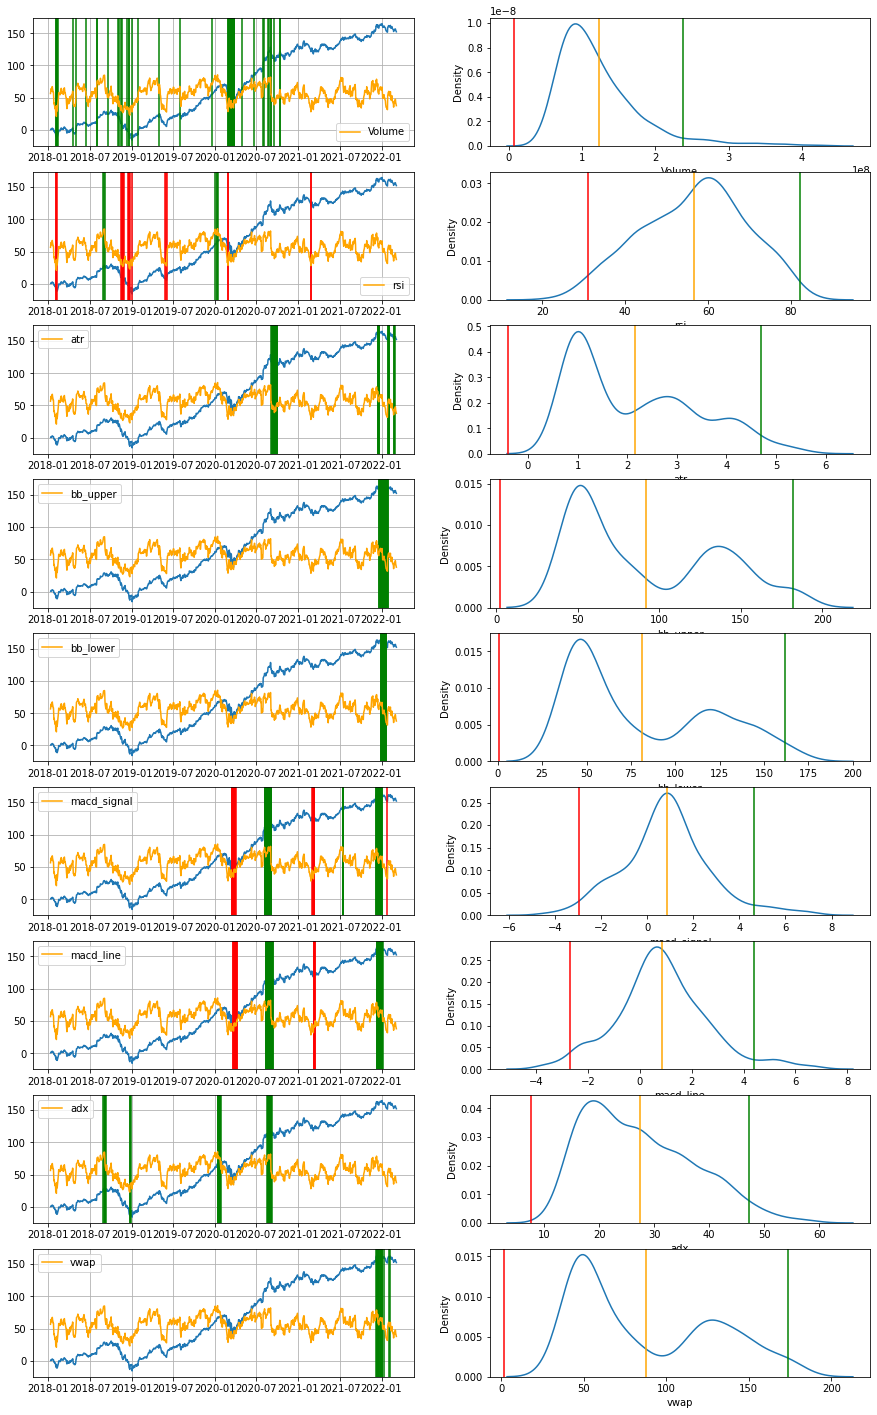

In [16]:
indicators_plot(cleaned_data, indicadores, figsize = (15,25) )


